In [1]:
import os
from src.clean import DataClean
from src.visual import DataVisual
from src.constants import GrpColumns
import numpy as np
from src.selector import high_correlated_cols
from scipy import stats

In [2]:
# initialize the data cleaning object
data_path = "data"
filename = os.path.join(data_path, "csv", "Query Results.csv")
dc = DataClean(file=filename)
v = DataVisual()

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:47: DtypeWarning: Columns (1,2,3,6,10,12,21,23,27,30,32,35,43,56,65,66,67,68,69,70,71,72,73,76,81,83,84,86,99,101,103,107,108,109,115,116,117,118,183,195,197,198,199,201,203,220,227,241,262,263,264,265,293,307,319,346,357,386) have mixed types. Specify dtype option on import or set low_memory=False.
  self.__dataframe = pd.read_csv(


In [3]:
"list_price" in dc.dataframe.columns

True

In [4]:
dc.dataframe.head()

,id,above_grade_finished_area_source,above_grade_finished_area_units,above_grade_finished_area,accessibility_features,additional_parcels_description,additional_parcels_yn,appliances,architectural_style,association_fee_frequency,...,window_features,withdrawn_date,wooded_area,year_built_source,year_built,zoning_description,zoning,inserted_at,updated_at,listing_id
0,4c5b08c1-f67f-462a-8511-7ca530222814,NaN,NaN,1767.0,{},NaN,NaN,"{Dishwasher,Microwave,Oven,Refrigerator,Washer...",{},NaN,...,{},NaN,NaN,NaN,NaN,NaN,NaN,2024-05-14 18:46,2024-05-14 18:46,NaN
1,c80b0b4d-802a-4662-9f8b-b12b8cfd20f7,NaN,NaN,NaN,{},NaN,NaN,{},{},NaN,...,{},NaN,NaN,NaN,NaN,NaN,NaN,2024-05-14 18:46,2024-05-14 18:46,NaN
2,5d88bac7-ee6d-4385-817b-416aa5e9222d,NaN,NaN,1915.0,{},NaN,NaN,"{Dishwasher,Disposal,""Gas Range"",""Gas Water He...",{},Quarterly,...,"{""Insulated Window(s)""}",NaN,NaN,NaN,2005.0,NaN,NaN,2024-05-14 18:46,2024-05-14 18:46,NaN
3,0d520afc-2785-4257-b484-6cda090f20e0,NaN,NaN,2187.0,{},NaN,NaN,"{Dishwasher,""Electric Cooktop"",Microwave,Refri...","{""Arts and Crafts""}",NaN,...,{},NaN,NaN,NaN,2021.0,NaN,NaN,2024-05-14 18:46,2024-05-14 18:46,NaN
4,6c072675-fb2f-44a1-b2e4-57ffc8fb595e,NaN,NaN,898.0,{},NaN,NaN,"{Dishwasher,Disposal,""Electric Cooktop"",""Elect...",{},Monthly,...,{},NaN,NaN,NaN,1985.0,NaN,R22MF,2024-05-14 18:46,2024-05-14 18:46,NaN


## 1. Explore the target feature

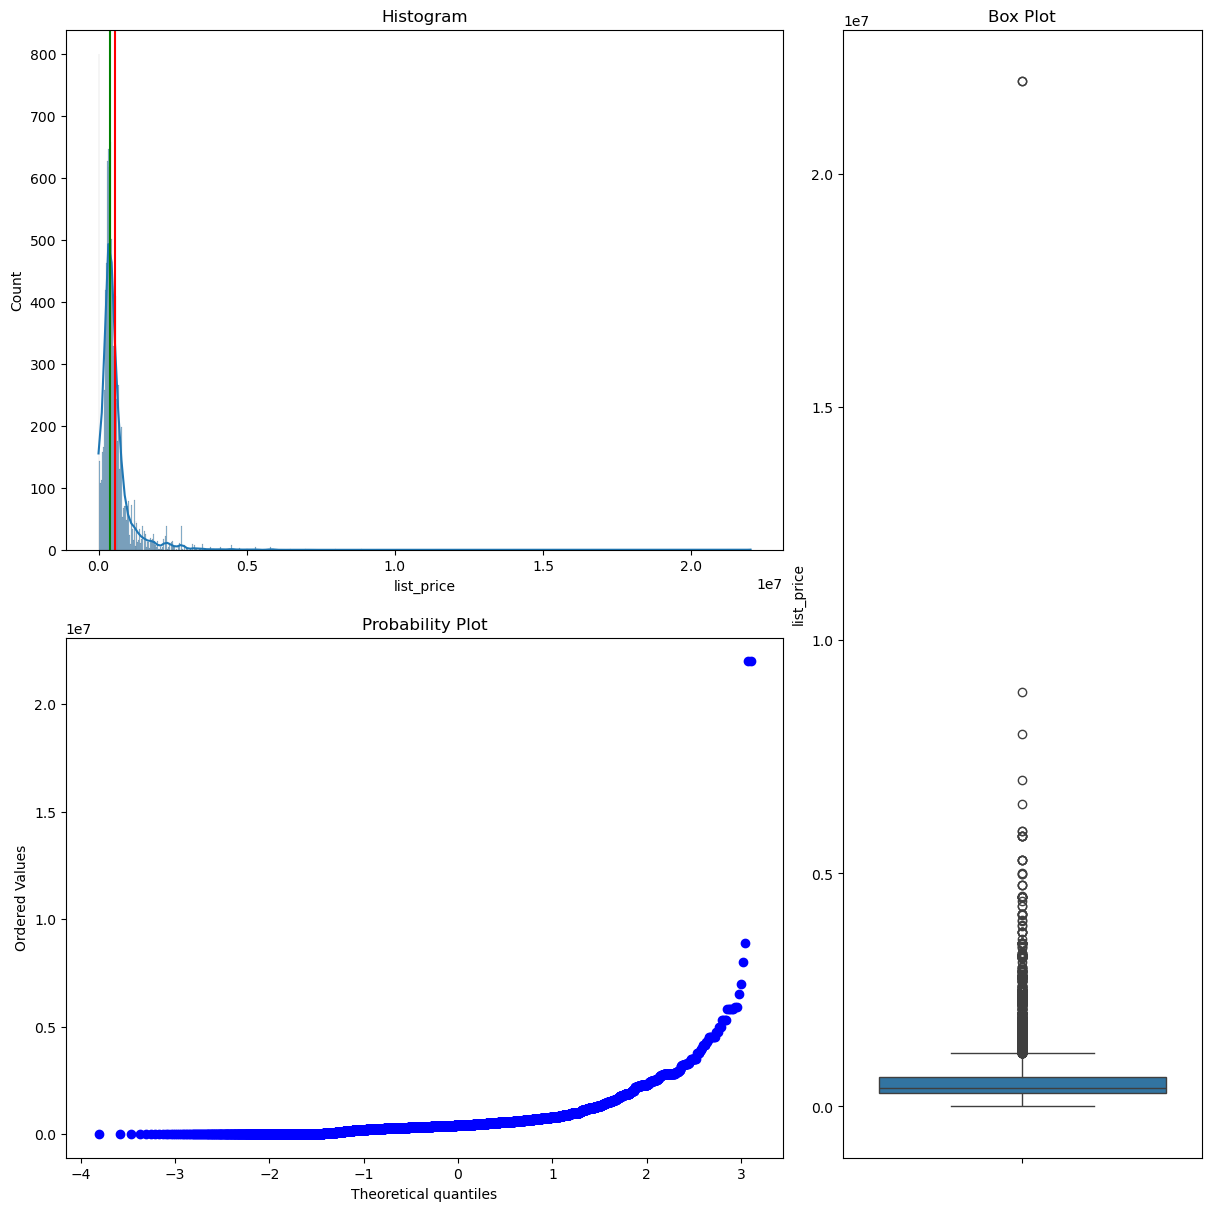

In [5]:
v.three_chart_plot(dc.dataframe, dc.y)

In [6]:
from scipy.stats import skew

print(
    "Skewness of the list price is",
    dc.dataframe["list_price"].skew(),
    skew(dc.dataframe["list_price"]),
)

Skewness of the list price is 10.008460239960383 nan


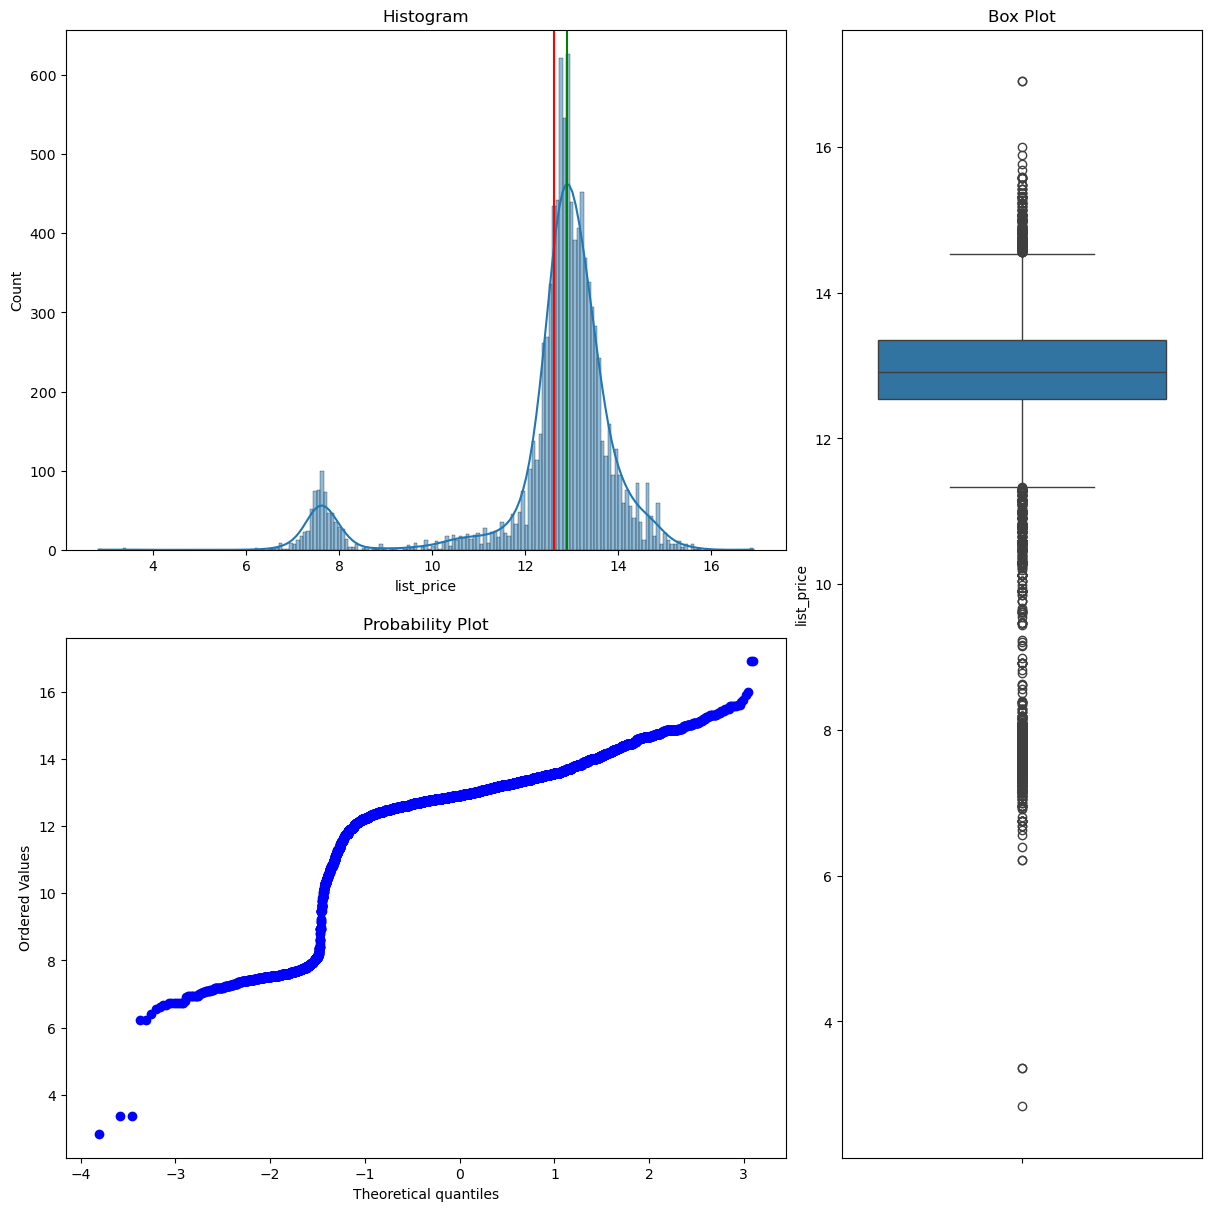

In [7]:
dc.nplog_y()
v.three_chart_plot(dc.dataframe, "list_price")
# dc.drop_cols(cols=["list_price"])

Check target skew

## 2. Display Missing Value Percentage

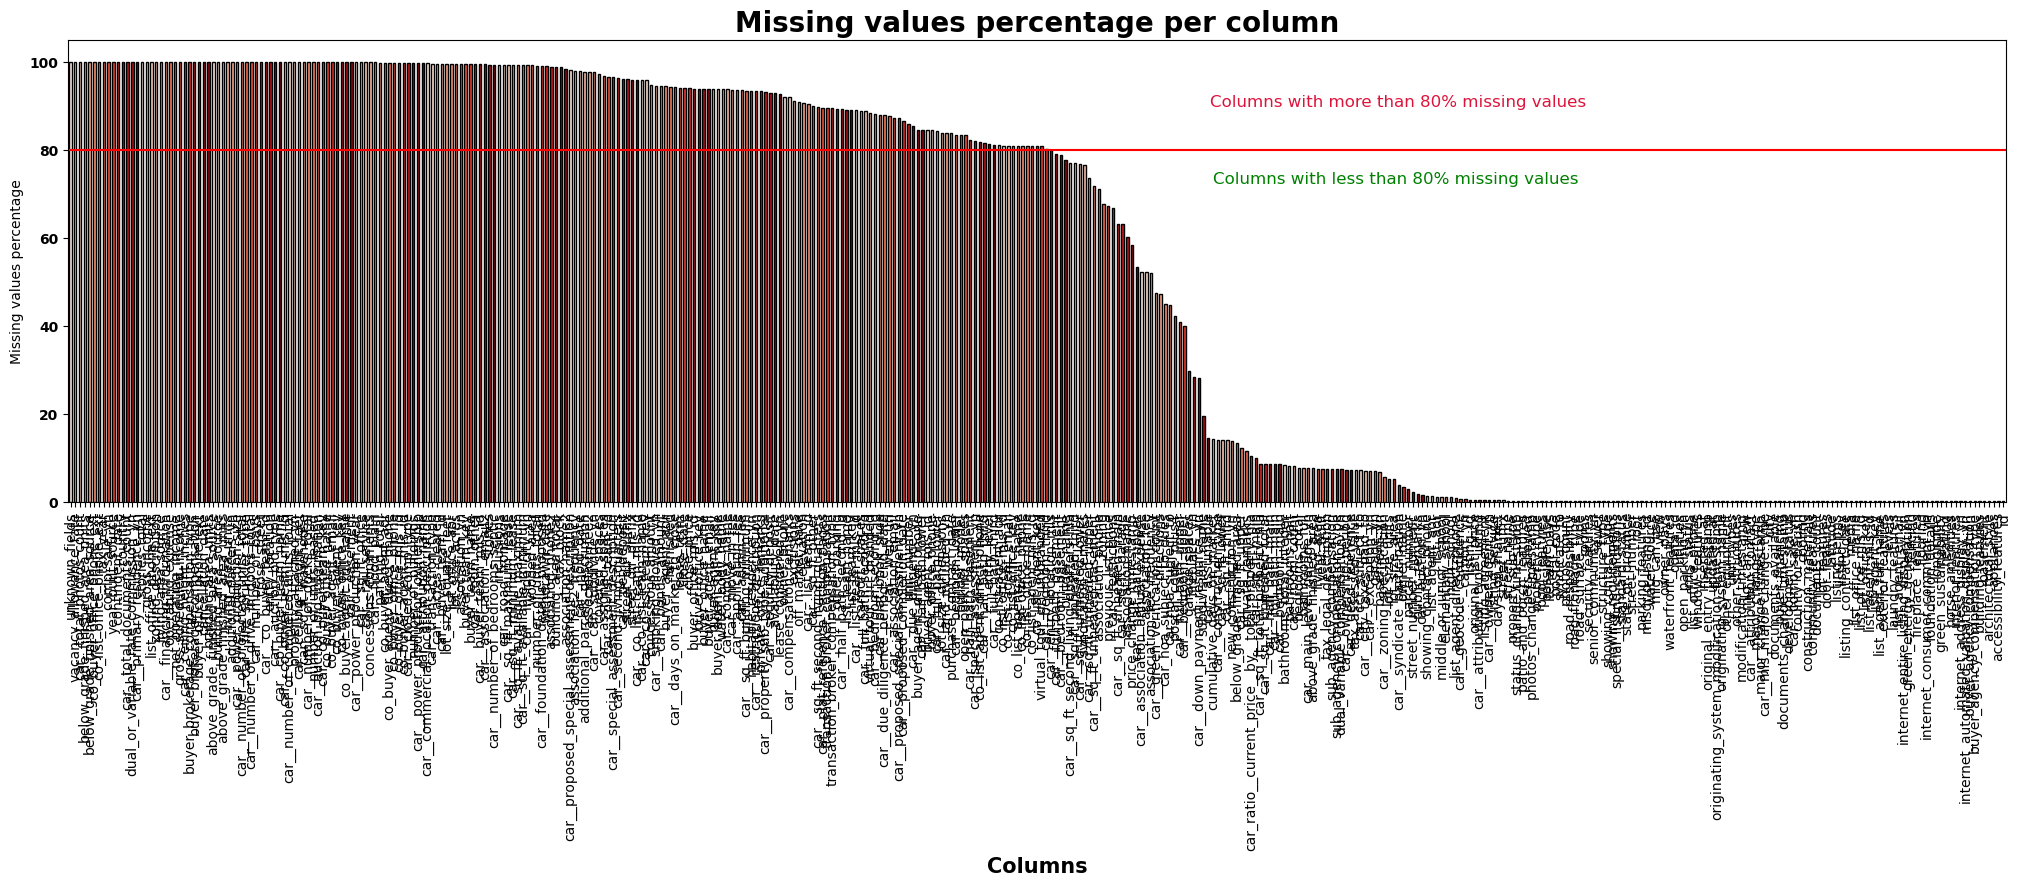

In [8]:
v.show_miss_percent(data=dc.dataframe, thresh=80)

## 3. Update nan value

### replace all "{}", "{None}", "", "N/A" to np.nan and drop dirty rows

In [9]:
dc.replace_empty_brackets()

dc.drop_dirty_rows()

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:190: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataframe.replace(


In [10]:
dc.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 408 entries, id to listing_id
dtypes: float64(127), object(281)
memory usage: 31.1+ MB


### 3.1 Update associated_yn

In [11]:
association_fields = [
            "association_fee_frequency",
            "association_fee",
            "association_fee2_frequency",
            "association_fee2",
            "association_name",
            "association_name2",
            "association_phone",
            "association_phone2",
        ]
dc.update_association_yn(
    fields=association_fields,
    target_col="association_yn",
)
dc.dataframe["association_yn"].isna().sum()

0

### 3.2. Update Basement_yn

In [12]:
dc.update_dependant_yn(depends="basement", target="basement_yn")

### 3.3 Update fireplace_yn

In [13]:
dc.update_dependant_yn(
    depends="fireplace_features",
    target="fireplace_yn",
)

### 3.4 Update Boolean Features: fill na and convert dtype

In [14]:
dc.update_binary_cols(cols=GrpColumns.BOOL_COLS)

for col new_construction_yn fill na median 1.0
for col open_parking_yn fill na median 1.0
for col senior_community_yn fill na median 1.0


/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:367: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:367: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:367: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

In [15]:
dc.dataframe[
    GrpColumns.BOOL_COLS["false"] + GrpColumns.BOOL_COLS["freq"] + GrpColumns.BOOL_COLS["other"]
].isna().sum()

car__land_included_yn            0
car__main_level_garage_yn        0
car__down_payment_resource_yn    0
carport_yn                       0
garage_yn                        0
new_construction_yn              0
open_parking_yn                  0
senior_community_yn              0
fireplace_yn                     0
association_yn                   0
basement_yn                      0
dtype: int64

### 3.5 Update Int Features: fill na and convert dtype

In [16]:
"security_features" in GrpColumns.INT_COLS

False

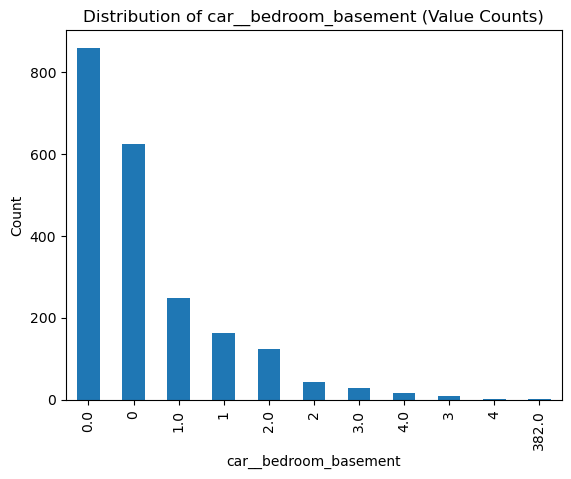

In [17]:
v.bar_chart(dc.dataframe, cols=["car__bedroom_basement"])

In [18]:
dc.update_int_cols(cols=GrpColumns.INT_COLS)

processing car__bedroom_basement
processing done car__bedroom_basement
processing car__bedroom_lower
processing done car__bedroom_lower
processing car__bedroom_main
processing done car__bedroom_main
processing car__bedroom_second_lq
processing done car__bedroom_second_lq
processing car__bedroom_third
processing done car__bedroom_third
processing car__bedroom_upper
processing done car__bedroom_upper
processing car__green_verification_count
processing done car__green_verification_count
processing car__full_bath_basement
processing done car__full_bath_basement
processing car__full_bath_lower
processing done car__full_bath_lower
processing car__full_bath_main
processing done car__full_bath_main
processing car__full_bath_second_lq
processing done car__full_bath_second_lq
processing car__full_bath_third
processing done car__full_bath_third
processing car__full_bath_upper
processing done car__full_bath_upper
processing car__half_bath_basement
processing done car__half_bath_basement
processing

In [19]:
dc.dataframe[
    GrpColumns.INT_COLS["median"]
    + GrpColumns.INT_COLS["freq"]
    + GrpColumns.INT_COLS["zero"]
    + GrpColumns.INT_COLS["other"]
].isna().sum()

year_built                             0
bathrooms_full                         0
bathrooms_half                         0
bathrooms_total_integer                0
bedrooms_total                         0
documents_count                        0
car__bedroom_basement                  0
car__bedroom_lower                     0
car__bedroom_main                      0
car__bedroom_second_lq                 0
car__bedroom_third                     0
car__bedroom_upper                     0
car__green_verification_count          0
car__full_bath_basement                0
car__full_bath_lower                   0
car__full_bath_main                    0
car__full_bath_second_lq               0
car__full_bath_third                   0
car__full_bath_upper                   0
car__half_bath_basement                0
car__half_bath_lower                   0
car__half_bath_main                    0
car__half_bath_second_lq               0
car__half_bath_third                   0
car__half_bath_u

### 3.6 Update Float columns: fill na and convert dtype

In [20]:
dc.update_num_cols(cols=GrpColumns.FLOAT_COLS)

for col above_grade_finished_area fill na median 1840.0
for col below_grade_finished_area fill na median 0.0
for col living_area fill na median 1932.0
for col lot_size_area fill na median 0.306
for col original_list_price fill na median 410000.0
for col tax_assessed_value fill na median 285600.0


In [21]:
dc.dataframe[
    GrpColumns.FLOAT_COLS["median"]
    + GrpColumns.FLOAT_COLS["zero"]
    + GrpColumns.FLOAT_COLS["other"]
].isna().sum()

above_grade_finished_area                           0
below_grade_finished_area                           0
living_area                                         0
lot_size_area                                       0
original_list_price                                 0
tax_assessed_value                                  0
car__association_annual_expense                     0
car__acres_cleared                                  0
car__admin_fee                                      0
car__application_fee                                0
car__sq_ft_unheated_basement                        0
car__sq_ft_unheated_lower                           0
car__sq_ft_unheated_main                            0
car__sq_ft_unheated_third                           0
car__sq_ft_unheated_total                           0
car__sq_ft_unheated_upper                           0
car__sq_ft_garage                                   0
car__sq_ft_lower                                    0
car__sq_ft_main             

### 3.7 Update str columns: fill na and convert dtype

In [22]:
dc.update_str_cols(cols=GrpColumns.STR_COLS)

for col car__entry_location_mls fill na freq Main
for col car__zoning_specification fill na freq RES
for col county_or_parish fill na freq Mecklenburg
for col levels fill na freq {Two}
for col state_or_province fill na freq NC
for col property_type fill na freq Residential
for col property_sub_type fill na freq Single Family Residence
for col street_name fill na freq Deer Brook


In [23]:
dc.dataframe[
    GrpColumns.STR_COLS["freq"]
    + GrpColumns.STR_COLS["Unspecified"]
    + GrpColumns.STR_COLS["None"]
    + GrpColumns.STR_COLS["other"]
].isna().sum()

car__entry_location_mls      0
car__zoning_specification    0
county_or_parish             0
levels                       0
state_or_province            0
property_type                0
property_sub_type            0
street_name                  0
elementary_school            0
high_school                  0
middle_or_junior_school      0
car_hoa_subject_to           0
city                         0
postal_code                  0
dtype: int64

### 3.8 Update Multiple Option Features: BinaryEncoding

In [24]:
dc.mlb_transform_cols(cols=GrpColumns.ENGINEER_COLS)

In [25]:
dc.dataframe.isnull().sum()

id                                      0
above_grade_finished_area_source    10000
above_grade_finished_area_units     10000
above_grade_finished_area               0
additional_parcels_description       9772
                                    ...  
window_features_insulatedwindows        0
window_features_skylights               0
window_features_stormwindows            0
window_features_windowtreatments        0
window_features_nan                     0
Length: 869, dtype: int64

### 3.9 update date columns

In [26]:
dc.extract_date(cols=GrpColumns.DATE_COLS)

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:555: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.__dataframe[col].fillna(
/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:555: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

for col listing_contract_date fill na freq 2024-05-13 00:00:00
for col original_entry_timestamp fill na freq 2024-05-12 03:48:00


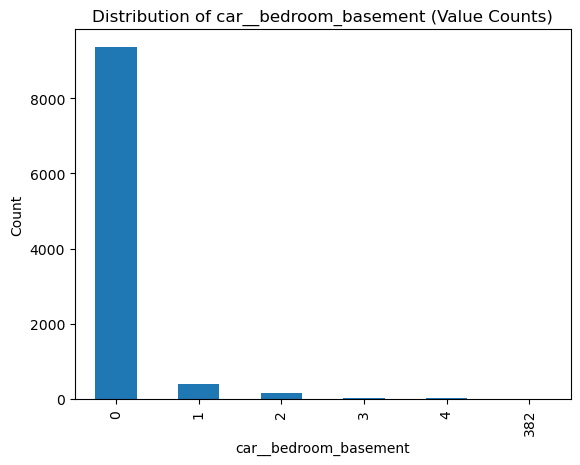

In [27]:
v.bar_chart(dc.dataframe, cols=["car__bedroom_basement"])

In [28]:
dc.dataframe[dc.dataframe["car__bedroom_basement"]==382].id

6111    7db45073-9604-49bb-b5ab-fb274b74c1ea
Name: id, dtype: object

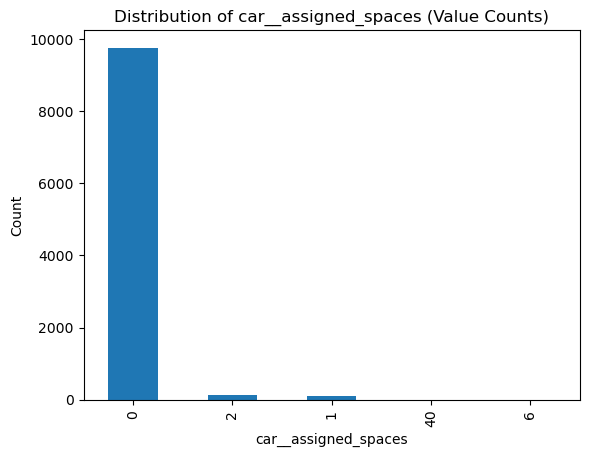

In [29]:
v.bar_chart(dc.dataframe, cols=["car__assigned_spaces"])

In [30]:
dc.dataframe[dc.dataframe["car__assigned_spaces"] == 40].id

664     978e5149-78b7-4c03-a4a7-10480b1078c8
3526    3ed8db12-a9c5-40fc-9b38-2ddbad2ac3a9
Name: id, dtype: object

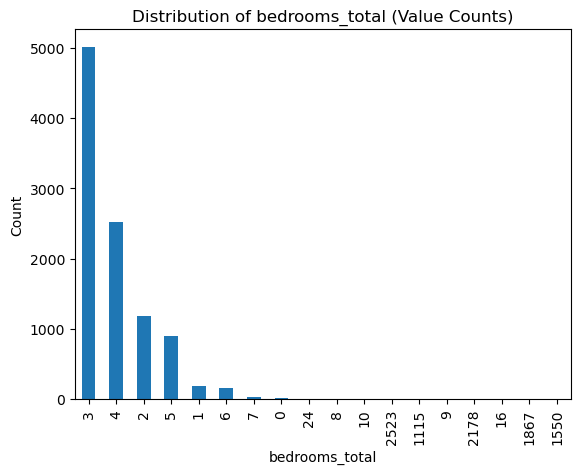

In [31]:
v.bar_chart(dc.dataframe, cols=["bedrooms_total"])

In [32]:
dc.dataframe[dc.dataframe["bedrooms_total"].isin([2523, 1115, 2178, 1867, 1550])].id

4776    c40dc42b-1645-41ac-86ee-c10fbdeed867
6072    a5d2bac5-a37b-4a6c-b81e-79977442281c
6111    7db45073-9604-49bb-b5ab-fb274b74c1ea
8954    f1254ba1-6700-41bc-83cc-aec5eb8060f4
9736    b3a99370-9f7a-4d8b-ac85-e95123bc800a
Name: id, dtype: object

In [33]:
dc.dataframe["documents_count"].dtypes

dtype('int32')

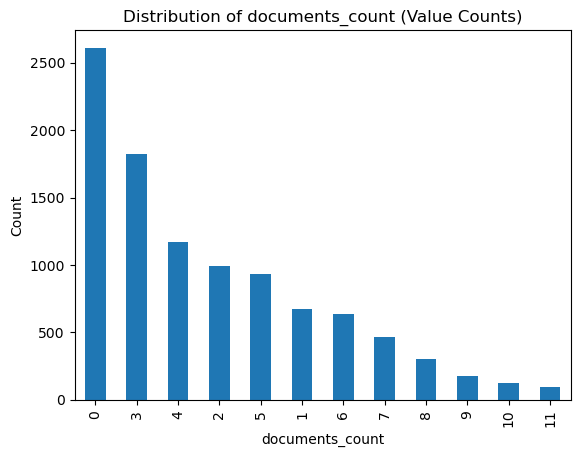

In [34]:
v.bar_chart(dc.dataframe, cols=["documents_count"])

### 3.10 update skewed columns

In [35]:
dc.update_skewed()

Column car__bedroom_basement contains non-positive values. Adding a small const. [  1   0   2   3   4 382]
Column car__bedroom_third contains non-positive values. Adding a small const. [  0   2   3   1 905 421]
Column carport_spaces contains non-positive values. Adding a small const. [  2   0   1   3   4 611   6   5   7]
Column car__bedroom_upper contains non-positive values. Adding a small const. [  0   3   2   4   1   5   6 810 956  24]
Column car__acres_cleared contains non-positive values. Adding a small const. [ 0.    7.    0.23  1.    1.6   9.    0.2   3.    0.3  16.   55.    0.1
  0.4   2.   20.    1.8   0.83  0.21  0.38  1.94  0.55 18.  ]
Column car__number_of_drive_in_doors_total contains non-positive values. Adding a small const. [0 3 4]
Column car__number_of_bays contains non-positive values. Adding a small const. [0 4]
Box-Cox transformation failed for column car__number_of_bays: The algorithm terminated without finding a valid bracket. Consider trying different initial poi

## 4. Remove Irrelevant features

In [36]:
remove_list = list(set(GrpColumns.IRRELEVANT_COLS).union(set(GrpColumns.REMOVE_COLS)) - set(dc.removed_cols))
dc.drop_cols(cols=remove_list)

## 5. Remove all features that have 100% missing data

In [37]:
# dc.conv_category_cols(GrpColumns.ENGINEER_COLS)
dc.remove_missing(miss_perc=100)

Removing feature: above_grade_finished_area_source with 100.0% missing
Removing feature: above_grade_finished_area_units with 100.0% missing
Feature above_grade_finished_area >> Missing entries: 0 |  Percentage: 0.0 | Unique values: 2368
Removing feature: additional_parcels_yn with 100.0% missing
Feature association_yn >> Missing entries: 0 |  Percentage: 0.0 | Unique values: 2
[False  True]
Feature basement_yn >> Missing entries: 0 |  Percentage: 0.0 | Unique values: 2
[ True False]
Feature bathrooms_full >> Missing entries: 0 |  Percentage: 0.0 | Unique values: 10
[1.20651839e+00 9.83558770e-01 6.46099111e-01 1.49922759e+00
 1.37061731e+00 1.69262056e+00 1.60427363e+00 9.99999397e-07
 2.14836493e+00 1.94651362e+00]
Feature bathrooms_half >> Missing entries: 0 |  Percentage: 0.0 | Unique values: 8
[9.99999577e-07 7.31463386e-01 1.19693584e+00 1.54525656e+00
 1.82625609e+00 2.06312087e+00 2.45064726e+00 2.61432515e+00]
Feature bathrooms_total_integer >> Missing entries: 0 |  Percentage

## 6 Encoding features

### 6.1 One Hot Encoding for GrpColumns.OH_ENC

In [38]:
dc.one_hot_enc(GrpColumns.OH_ENC)

In [39]:
dc.dataframe["state_or_province_SC"]

0       False
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: state_or_province_SC, Length: 10000, dtype: bool

### 6.2 Label Encoding for GrpColumns.LABEL_ENC

In [40]:
dc.label_enc(GrpColumns.LABEL_ENC)

In [41]:
dc.dataframe["levels_enc"]

0        7
1       10
2       10
3       10
4        7
        ..
9995     7
9996     7
9997    10
9998     8
9999     7
Name: levels_enc, Length: 10000, dtype: int64

### 6.3 Target Encoding for GrpColumns.TARGET_ENC

In [42]:
dc.target_enc(GrpColumns.TARGET_ENC)

In [43]:
dc.dataframe["street_name_enc"]

0       12.715985
1       12.208516
2       12.636591
3       12.806767
4       12.496380
          ...    
9995    12.578352
9996    12.646747
9997    12.726996
9998    12.686635
9999    12.703463
Name: street_name_enc, Length: 10000, dtype: float64

### 6.4 Numerical Encoding the others

## Remove outliers

bedrooms_total
car__assigned_spaces
car__bedroom_basement

In [44]:
dc.dataframe[dc.dataframe.bedrooms_total >= 50]

,above_grade_finished_area,association_yn,basement_yn,bathrooms_full,bathrooms_half,bathrooms_total_integer,bedrooms_total,below_grade_finished_area,car__acres_cleared,car__admin_fee,...,levels_enc,city_enc,postal_code_enc,elementary_school_enc,high_school_enc,middle_or_junior_school_enc,street_name_enc,car__zoning_specification_enc,county_or_parish_enc,property_sub_type_enc


In [45]:
for col in dc.dataframe.columns:
    print(col)

above_grade_finished_area
association_yn
basement_yn
bathrooms_full
bathrooms_half
bathrooms_total_integer
bedrooms_total
below_grade_finished_area
car__acres_cleared
car__admin_fee
car__application_fee
car__assigned_spaces
car__association_annual_expense
car__bedroom_basement
car__bedroom_lower
car__bedroom_main
car__bedroom_second_lq
car__bedroom_third
car__bedroom_upper
car__down_payment_resource_yn
car__full_bath_basement
car__full_bath_lower
car__full_bath_main
car__full_bath_second_lq
car__full_bath_third
car__full_bath_upper
car__green_verification_count
car__half_bath_basement
car__half_bath_lower
car__half_bath_main
car__half_bath_second_lq
car__half_bath_third
car__half_bath_upper
car__land_included_yn
car__main_level_garage_yn
car__number_of_bays
car__number_of_bedrooms_septic
car__number_of_docks_total
car__number_of_drive_in_doors_total
car__room_count
car__security_deposit
car__sq_ft_garage
car__sq_ft_lower
car__sq_ft_main
car__sq_ft_third
car__sq_ft_total_property_hla
ca

## Correlation Coefficient

len of columns 584


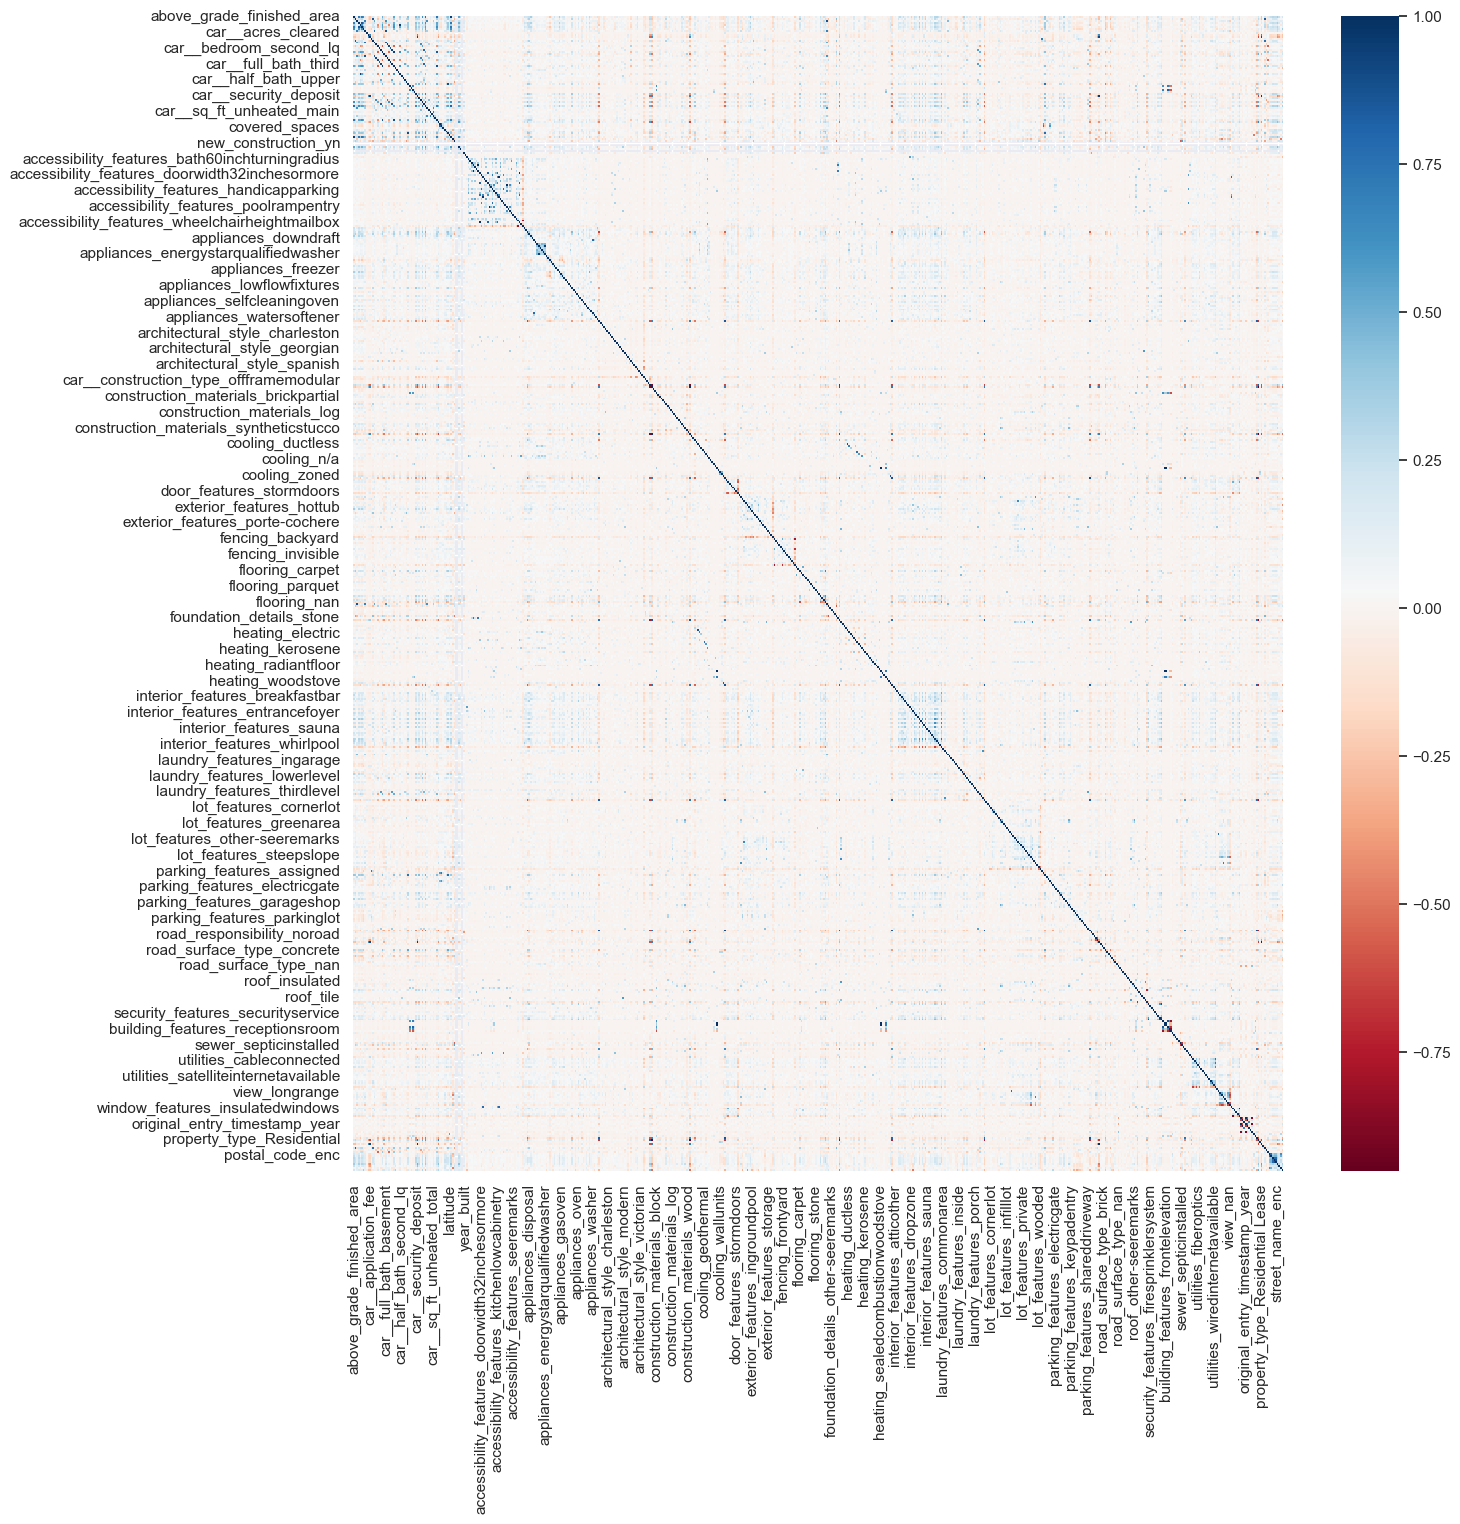

In [46]:
rm_cols = high_correlated_cols(dc.dataframe, plot=True, corr_th=0.7)

In [47]:
for i in rm_cols:
    print(i)
print(len(rm_cols))

bathrooms_total_integer
car__application_fee
car__association_annual_expense
car__bedroom_basement
car__full_bath_basement
car__full_bath_lower
car__full_bath_main
car__full_bath_second_lq
car__full_bath_third
car__full_bath_upper
car__half_bath_main
car__security_deposit
car__sq_ft_third
car__sq_ft_total_property_hla
car__sq_ft_unheated_total
car__sq_ft_upper
carport_yn
garage_yn
living_area
accessibility_features_bathscaldcontrolfaucet
accessibility_features_exteriorcurbcuts
accessibility_features_hallwidth36inchesormore
accessibility_features_kitchenlowcabinetry
accessibility_features_kitchenlowcounters
accessibility_features_mobilityfriendlyflooring
accessibility_features_poolrampentry
accessibility_features_wheelchairheightmailbox
accessibility_features_nan
appliances_energystarqualifiedwasher
appliances_washer
car__construction_type_nan
construction_materials_nan
cooling_nan
fencing_nan
foundation_details_basement
foundation_details_stone
foundation_details_nan
heating_ductless
h

In [48]:
dc.drop_cols(cols=rm_cols)

In [49]:
dc.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 514 entries, above_grade_finished_area to property_sub_type_enc
dtypes: bool(457), float32(18), float64(28), int32(8), int64(3)
memory usage: 7.7 MB


### _It is apparent that target feature doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution._

In [50]:
normal = dc.dataframe.apply(lambda x: stats.shapiro(x).pvalue < 0.05)
# print(normal)
# print(not normal.any())
print(not normal.any())

False


/opt/miniconda3/envs/housing/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)
/opt/miniconda3/envs/housing/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


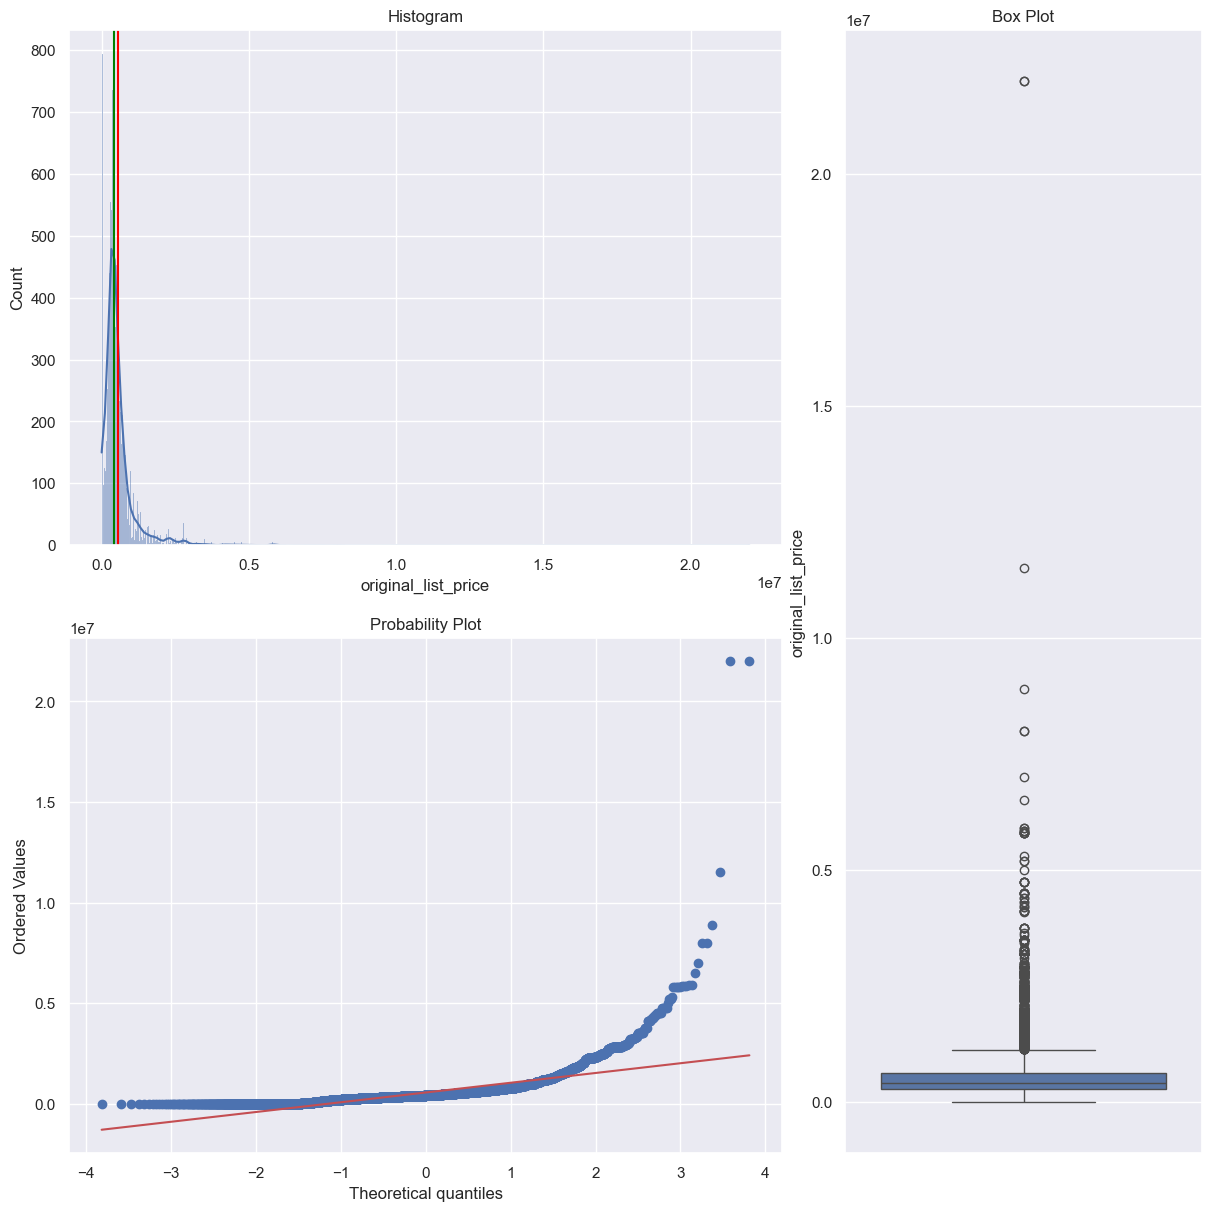

In [51]:
v.three_chart_plot(dc.dataframe, "original_list_price")

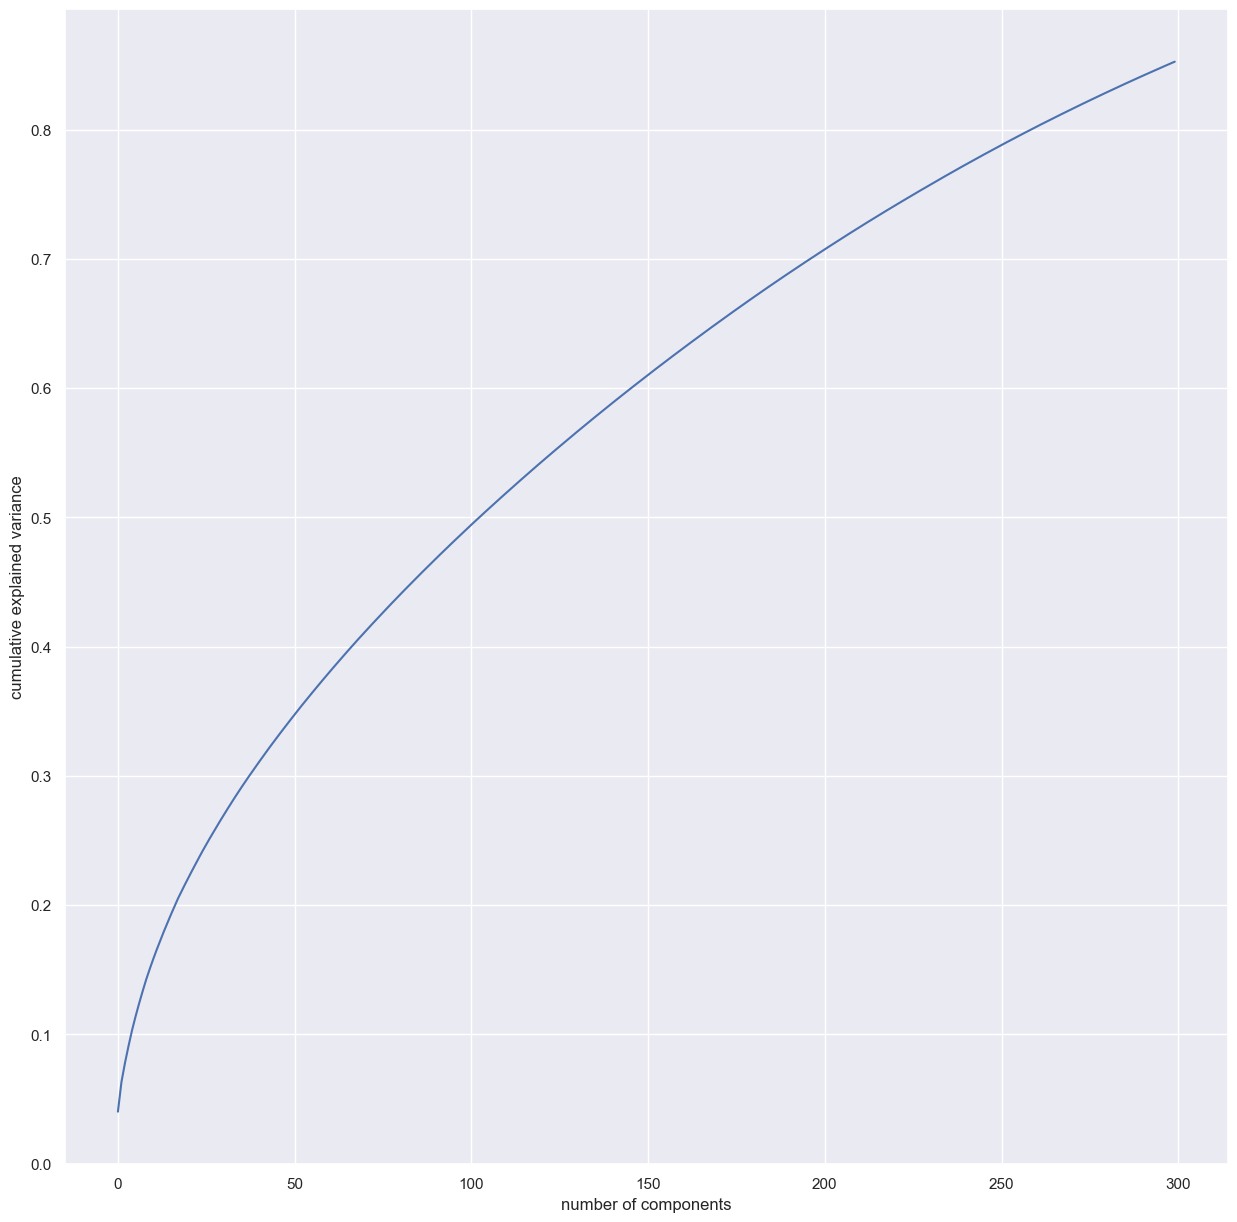

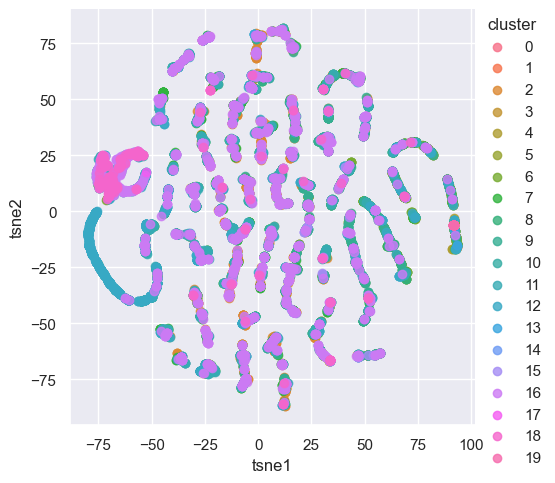

In [52]:
v.plot_pca(df=dc.dataframe, n_comp=300, k_cluster=20, plot=True)

In [53]:
for feature in dc.dataframe.columns:
    print(feature)

above_grade_finished_area
association_yn
basement_yn
bathrooms_full
bathrooms_half
bedrooms_total
below_grade_finished_area
car__acres_cleared
car__admin_fee
car__assigned_spaces
car__bedroom_lower
car__bedroom_main
car__bedroom_second_lq
car__bedroom_third
car__bedroom_upper
car__down_payment_resource_yn
car__green_verification_count
car__half_bath_basement
car__half_bath_lower
car__half_bath_second_lq
car__half_bath_third
car__half_bath_upper
car__land_included_yn
car__main_level_garage_yn
car__number_of_bays
car__number_of_bedrooms_septic
car__number_of_docks_total
car__number_of_drive_in_doors_total
car__room_count
car__sq_ft_garage
car__sq_ft_lower
car__sq_ft_main
car__sq_ft_unheated_basement
car__sq_ft_unheated_lower
car__sq_ft_unheated_main
car__sq_ft_unheated_third
car__sq_ft_unheated_upper
car_ratio__current_price__by__total_property_hla
carport_spaces
covered_spaces
documents_count
fireplace_yn
latitude
list_price
longitude
lot_size_area
new_construction_yn
open_parking_yn
or

In [55]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import pandas as pd

dc.dataframe = dc.dataframe.reindex(sorted(dc.dataframe.columns), axis=1)
X = dc.dataframe.drop(columns=dc.y).reset_index(drop=True)
y = dc.dataframe[dc.y]
 


In [56]:
ranks = fisher_score.fisher_score(X.values, y.values)

ZeroDivisionError: float division by zero

In [ ]:

feat_imp = pd.Series(ranks, dc.dataframe.columns[0 : len(dc.dataframe.columns) - 1])
feat_imp.plot(kind="barh", color="teal")
plt.show()

## Training with different models

In [ ]:
from datetime import datetime
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    RepeatedKFold,
    KFold,
)
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rand_state = 100
kfolds = KFold(n_splits=20, shuffle=True, random_state=rand_state)
# kfolds = RepeatedKFold(n_splits=20, n_repeats=5, random_state=rand_state)
dc.dataframe = dc.dataframe.reindex(sorted(dc.dataframe.columns), axis=1)
X = dc.dataframe.drop(columns=dc.y).reset_index(drop=True)
y = dc.dataframe[dc.y]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=rand_state
)


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y), np.expm1(y_pred)))


# build our model scoring function
def cv_rmse(model, X=X_train, y=y_train):
    rmse = np.sqrt(
        -cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds)
    )
    return rmse


# setup models
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
max_iter = int(1e7)

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=max_iter, alphas=alphas2, random_state=rand_state, cv=kfolds),
)

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=max_iter, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio),
)

svr = make_pipeline(
    RobustScaler(),
    SVR(
        C=20,
        epsilon=0.008,
        gamma=0.0003,
    ),
)


gbr = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=15,
    min_samples_split=10,
    loss="huber",
    random_state=rand_state,
    # objective="reg:squarederror",
)


lightgbm = LGBMRegressor(
    objective="regression",
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000,
    max_bin=200,
    bagging_fraction=0.75,
    bagging_freq=5,
    bagging_seed=7,
    feature_fraction=0.2,
    feature_fraction_seed=7,
    verbose=-1,
    # min_data_in_leaf=2,
    # min_sum_hessian_in_leaf=11
)


xgboost = XGBRegressor(
    learning_rate=0.01,
    n_estimators=3460,
    max_depth=3,
    min_child_weight=0,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    # objective="reg:linear",
    objective="reg:squarederror",
    nthread=-1,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.00006,
)

# stack
stack_gen = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
    meta_regressor=xgboost,
    use_features_in_secondary=True,
)


print("TEST score on CV")
score_ridge = cv_rmse(ridge)
print(
    "Kernel Ridge score: {:.4f} ({:.4f})\n".format(
        score_ridge.mean(), score_ridge.std()
    ),
    datetime.now(),
)

score_lasso = cv_rmse(lasso)
print(
    "Lasso score: {:.4f} ({:.4f})\n".format(score_lasso.mean(), score_lasso.std()),
    datetime.now(),
)

score_elast = cv_rmse(elasticnet)
print(
    "ElasticNet score: {:.4f} ({:.4f})\n".format(score_elast.mean(), score_elast.std()),
    datetime.now(),
)

score_svr = cv_rmse(svr)
print(
    "SVR score: {:.4f} ({:.4f})\n".format(score_svr.mean(), score_svr.std()),
    datetime.now(),
)

score_tgbm = cv_rmse(lightgbm)
print(
    "Lightgbm score: {:.4f} ({:.4f})\n".format(score_tgbm.mean(), score_tgbm.std()),
    datetime.now(),
)

score_gb = cv_rmse(gbr)
print(
    "GradientBoosting score: {:.4f} ({:.4f})\n".format(score_gb.mean(), score_gb.std()),
    datetime.now(),
)

score_xgb = cv_rmse(xgboost)
print(
    "Xgboost score: {:.4f} ({:.4f})\n".format(score_xgb.mean(), score_xgb.std()),
    datetime.now(),
)

TEST score on CV
Kernel Ridge score: 0.4865 (0.0664)
 2024-07-23 20:08:46.379899
Lasso score: 0.4911 (0.0780)
 2024-07-23 20:09:38.972899
ElasticNet score: 0.4846 (0.0725)
 2024-07-23 20:13:26.957747
SVR score: 0.4948 (0.0592)
 2024-07-23 20:17:00.541459
Lightgbm score: 0.1522 (0.0574)
 2024-07-23 20:19:20.553360
GradientBoosting score: 0.1914 (0.0794)
 2024-07-23 20:24:44.929908
Xgboost score: 0.1087 (0.0747)
 2024-07-23 20:27:32.869045


In [ ]:
print("START Fit")
print(datetime.now(), "StackingCVRegressor")
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))
print(datetime.now(), "ElasticNet")
elastic_model_full_data = elasticnet.fit(X_train, y_train)
print(datetime.now(), "Lasso")
lasso_model_full_data = lasso.fit(X_train, y_train)
print(datetime.now(), "Ridge")
ridge_model_full_data = ridge.fit(X_train, y_train)
print(datetime.now(), "SVR")
svr_model_full_data = svr.fit(X_train, y_train)
print(datetime.now(), "GradientBoosting")
gbr_model_full_data = gbr.fit(X_train, y_train)
print(datetime.now(), "XGBoost")
xgb_model_full_data = xgboost.fit(X_train, y_train)
print(datetime.now(), "LighTgbm")
lgb_model_full_data = lightgbm.fit(X_train, y_train)

START Fit
2024-07-23 20:27:32.875387 StackingCVRegressor
2024-07-23 20:33:13.895086 ElasticNet
2024-07-23 20:33:27.279792 Lasso
2024-07-23 20:33:30.501434 Ridge
2024-07-23 20:33:43.957871 SVR
2024-07-23 20:33:55.611763 GradientBoosting
2024-07-23 20:34:15.996758 XGBoost
2024-07-23 20:34:25.115340 LighTgbm


### Stack models

In [ ]:
scores = []
scores.extend(
    [
        round(score_ridge.mean(), 2),
        round(score_lasso.mean(), 2),
        round(score_elast.mean(), 2),
        round(score_svr.mean(), 2),
        round(score_tgbm.mean(), 2),
        round(score_gb.mean(), 2),
        round(score_xgb.mean(), 2),
    ]
)
total = sum(scores)
weights = [round(val / total, 2) for val in scores]
print(weights)

[0.2, 0.2, 0.2, 0.2, 0.06, 0.08, 0.05]


In [ ]:
def blend_models_predict(X):
    return (
        (0.04 * elastic_model_full_data.predict(X_test))
        + (0.04 * lasso_model_full_data.predict(X_test))
        + (0.04 * ridge_model_full_data.predict(X_test))
        + (0.04 * svr_model_full_data.predict(X_test))
        + (0.13 * gbr_model_full_data.predict(X_test))
        + (0.23 * xgb_model_full_data.predict(X_test))
        + (0.13 * lgb_model_full_data.predict(X_test))
        + (0.35 * stack_gen_model.predict(np.array(X_test)))
    )

y_pred = blend_models_predict(X_test)
print("RMSLE score on test data:")
print(rmsle(y_test, blend_models_predict(X_test)))

RMSLE score on test data:
78386.57368330508


In [ ]:
y_test.iloc[0], y_test.iloc[1]

(13.52649559761195, 10.819798284210286)

In [ ]:
print(np.expm1(y_test.iloc[0:10]), np.expm1(y_test.iloc[1]))

8018    749000.0
9225     50000.0
3854    779000.0
2029    850000.0
3539    850000.0
1942    236500.0
1250    457000.0
2817    339742.0
4211    125000.0
477     200000.0
Name: list_price, dtype: float64 50000.000000000015


In [ ]:
print(
    np.expm1(blend_models_predict(X_test))[0], np.expm1(blend_models_predict(X_test))[1]
)

721764.9534534661 48578.351207837404


In [ ]:
print(
    np.expm1(blend_models_predict(X_test))[0:10])

[721764.95345347  48578.35120784 724082.61224213 969718.88697894
 901933.30469487 234345.62604979 492795.56366301 331617.10761791
 131470.24955745 218040.28201166]


In [ ]:
print(np.expm1(y_test.iloc[0:10]))

8018    749000.0
9225     50000.0
3854    779000.0
2029    850000.0
3539    850000.0
1942    236500.0
1250    457000.0
2817    339742.0
4211    125000.0
477     200000.0
Name: list_price, dtype: float64


## Save Models

In [ ]:
import pickle

# save models as a pickle file
models = {
    "stack_gen_model.pkl": stack_gen_model,
    "elastic_model.pkl": elastic_model_full_data,
    "lasso_model.pkl": lasso_model_full_data,
    "ridge_model.pkl": ridge_model_full_data,
    "svr_model.pkl": svr_model_full_data,
    "gbr_model.pkl": gbr_model_full_data,
    "xgb_model.pkl": xgb_model_full_data,
    "lgb_model.pkl": lgb_model_full_data,
}

for key, val in models.items():
    with open(os.path.join("app/saved-models/", key), "wb") as file:
        pickle.dump(val, file)

# load model from pickle file
# with open(model_pkl_file, "rb") as file:
#     model = pickle.load(file)

In [ ]:
import joblib

# save models as a pickle file
models = {
    "stack_gen_model.sav": stack_gen_model,
    "elastic_model.sav": elastic_model_full_data,
    "lasso_model.sav": lasso_model_full_data,
    "ridge_model.sav": ridge_model_full_data,
    "svr_model.sav": svr_model_full_data,
    "gbr_model.sav": gbr_model_full_data,
    "xgb_model.sav": xgb_model_full_data,
    "lgb_model.sav": lgb_model_full_data,
}

for key, val in models.items():
    with open(os.path.join("app/saved-models/", key), "wb") as file:
        joblib.dump(val, file)

# load model with joblib
# loaded_model = joblib.load("app/saved-models/xgb_model.sav")

### get feature importance

In [ ]:
xgboost.feature_importances_.argsort()

array([256, 254, 253, 252, 251, 247, 246, 245, 244, 242, 241, 238, 236,
       235, 234, 233, 255, 231, 261, 264, 287, 286, 285, 284, 283, 282,
       281, 278, 277, 276, 274, 272, 268, 267, 266, 263, 288, 230, 456,
       182, 181, 180, 179, 175, 478, 169, 167, 166, 165, 163, 161, 158,
       156, 155, 183, 229, 187, 189, 227, 225, 224, 223, 221, 220, 219,
       215, 211, 209, 205, 201, 198, 192, 190, 188, 154, 289, 295, 411,
       409, 407, 406, 404, 403, 402, 400, 398, 397, 463, 394, 393, 464,
       389, 413, 387, 415, 420, 455, 454, 453, 452, 458, 449, 447, 445,
       444, 438, 460, 435, 461, 423, 421, 417, 294, 386, 376, 333, 332,
       331, 330, 329, 323, 322, 470, 319, 315, 311, 308, 303, 302, 301,
       336, 465, 339, 344, 375, 466, 370, 367, 366, 365, 364, 363, 358,
       357, 356, 468, 347, 346, 345, 342, 480, 457, 150,  59, 131,  63,
        66, 497, 128,  72,  78,  79, 487,  80,  85,  87, 496,  91,  92,
       125,  93, 124,  96,  99, 100, 101, 108, 122, 493, 492, 11

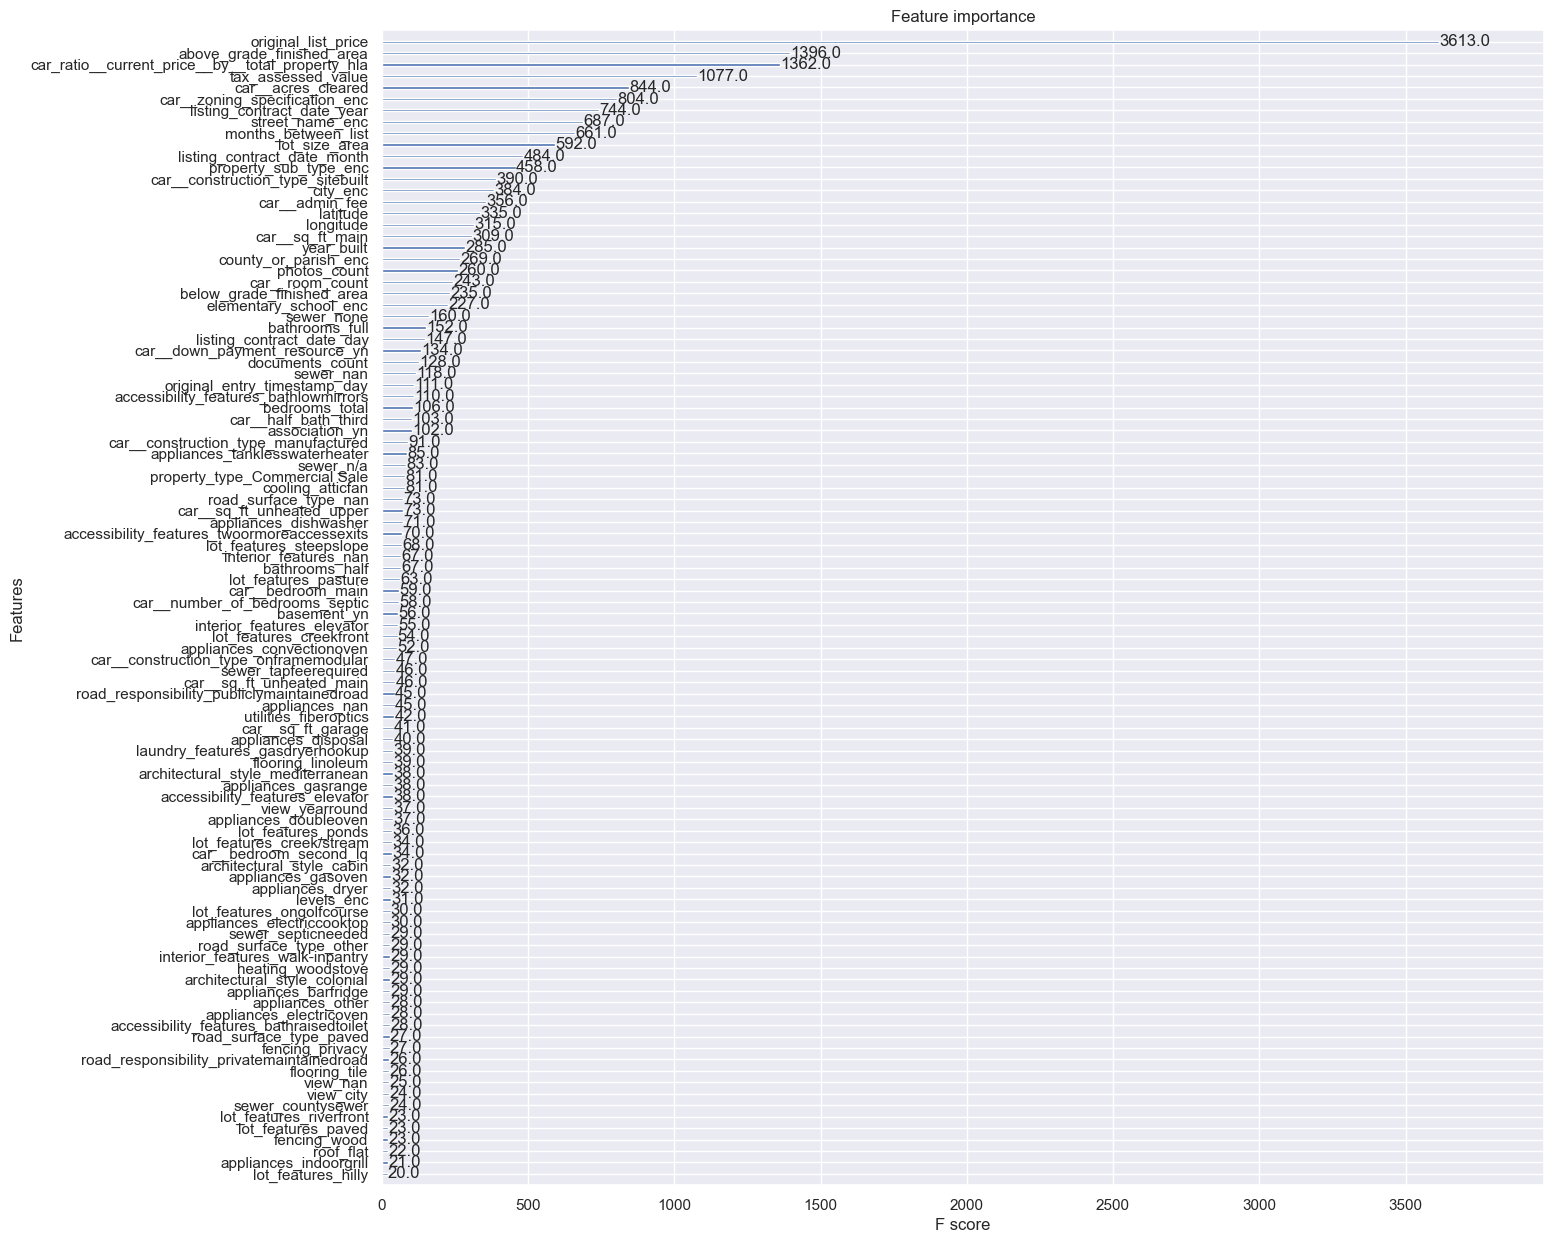

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(xgboost, max_num_features=100, )
plt.show()

In [ ]:
# load model with joblib
loaded_model = joblib.load("app/saved-models/xgb_model.sav")
loaded_model.get_booster().get_score(importance_type="weight")

{'above_grade_finished_area': 1396.0,
 'accessibility_features_accessible': 11.0,
 'accessibility_features_bath60inchturningradius': 2.0,
 'accessibility_features_bathleverfaucets': 2.0,
 'accessibility_features_bathlowmirrors': 110.0,
 'accessibility_features_bathraisedtoilet': 28.0,
 'accessibility_features_bathroll-undersink': 1.0,
 'accessibility_features_elevator': 38.0,
 'accessibility_features_entryslopelessthan1foot': 1.0,
 'accessibility_features_ramps-mainlevel': 1.0,
 'accessibility_features_remotedevices': 14.0,
 'accessibility_features_roll-inshower': 4.0,
 'accessibility_features_swingindoors': 1.0,
 'accessibility_features_twoormoreaccessexits': 70.0,
 'appliances_barfridge': 29.0,
 'appliances_convectionoven': 52.0,
 'appliances_dishwasher': 71.0,
 'appliances_disposal': 40.0,
 'appliances_doubleoven': 37.0,
 'appliances_downdraft': 1.0,
 'appliances_dryer': 32.0,
 'appliances_electriccooktop': 30.0,
 'appliances_electricoven': 28.0,
 'appliances_electricrange': 20.0,
 

In [ ]:
# v.bar_chart(dc.dataframe, cols=["tax_assessed_value"])

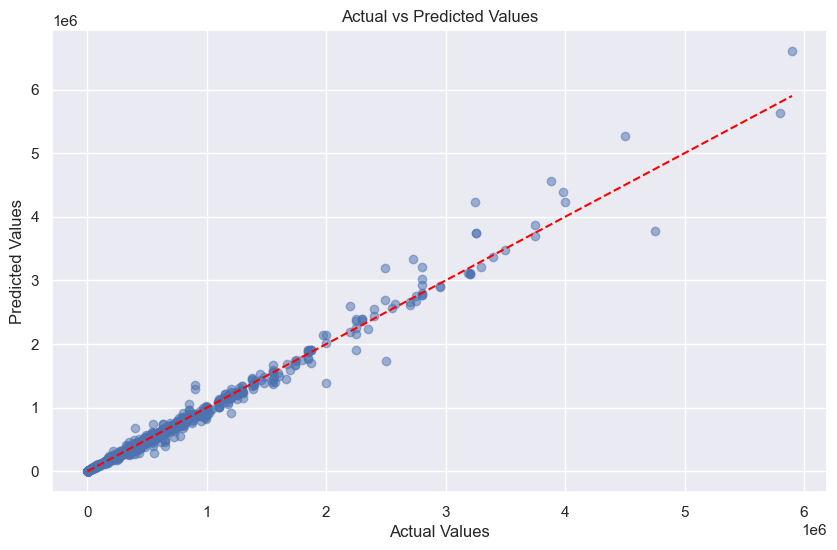

In [ ]:
v.scatter_y_and_yhat(y_test, y_pred)